# Validating a dihedral potential

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt

In [3]:
from lammps import IPyLammps

In [4]:
L = IPyLammps()

LAMMPS output is captured by PyLammps wrapper


In [5]:
import math

L.units("real")
L.atom_style("molecular")

L.boundary("f f f")
L.neighbor(0.3, "bin")

L.dihedral_style("harmonic")

In [6]:
L.read_data("data.dihedral")

['Reading data file ...',
 '  triclinic box = (-5 -5 -5) to (5 5 5) with tilt (0 0 0)',
 '  1 by 1 by 1 MPI processor grid',
 '  reading atoms ...',
 '  4 atoms',
 '  scanning dihedrals ...',
 '  1 = max dihedrals/atom',
 '  reading dihedrals ...',
 '  1 dihedrals',
 'Finding 1-2 1-3 1-4 neighbors ...',
 ' Special bond factors lj:   0          0          0         ',
 ' Special bond factors coul: 0          0          0         ',
 '  0 = max # of 1-2 neighbors',
 '  0 = max # of 1-3 neighbors',
 '  0 = max # of 1-4 neighbors',
 '  1 = max # of special neighbors']

In [7]:
L.pair_style("zero", 5)
L.pair_coeff("*", "*")

In [8]:
L.mass(1, 1.0)

In [9]:
L.velocity("all", "set", 0.0, 0.0, 0.0)

In [10]:
L.run(0);

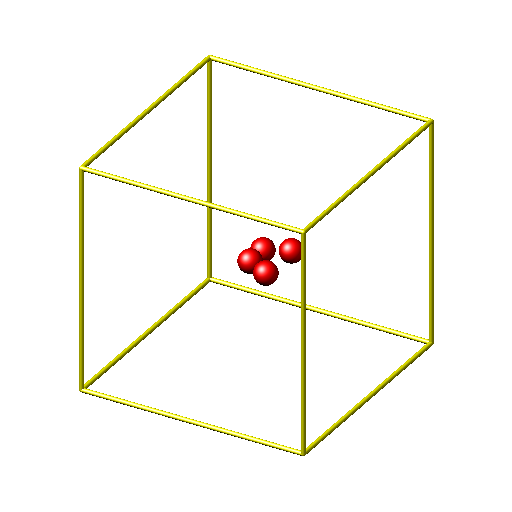

In [11]:
L.image(zoom=1.0)

In [12]:
L.atoms[3].position

(1.0000000000000009, 1.0000000000000009, 0.0)

In [13]:
L.atoms[3].position = (1.0, 0.0, 1.0)

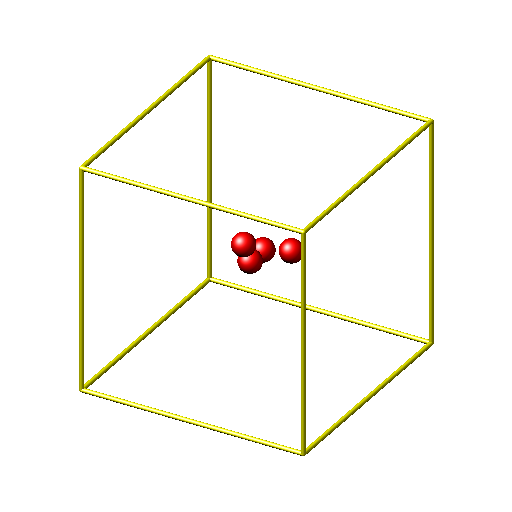

In [14]:
L.image(zoom=1.0)

In [15]:
L.eval("pe")

160.0

In [16]:
L.atoms[3].position = (1.0, 0.0, -1.0)

In [17]:
L.run(0);

In [18]:
phi = [d * math.pi / 180 for d in range(360)]

In [19]:
pos = [(1.0, math.cos(p), math.sin(p)) for p in phi]

In [20]:
K = 80.0
d = 1
n = 2
E_analytical = [K * (1 + d * math.cos(n*p)) for p in phi]

In [21]:
pe = []
for p in pos:
    L.atoms[3].position = p
    L.run(0);
    pe.append(L.eval("pe"))

<IPython.core.display.Javascript object>


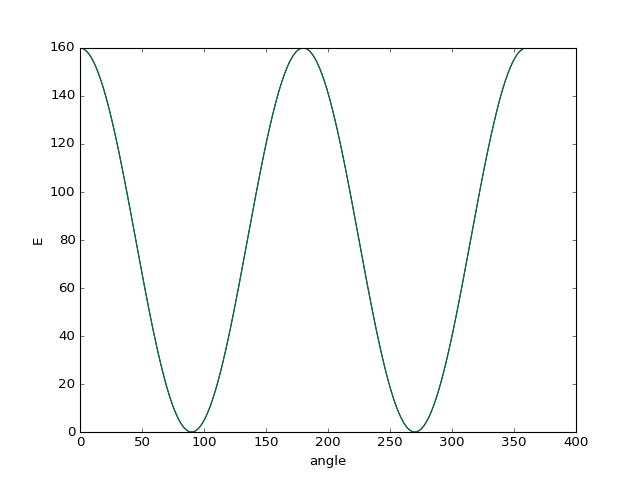

In [22]:
plt.plot(range(360), pe, range(360), E_analytical)
plt.xlabel('angle')
plt.ylabel('E')